### polymorphism
* In programming, polymorphism consists of two words poly+morphism poly means many, morphism means forms.
* Polymorphism is the ability of an object to take on many forms.
* which means we can think of systems can have multiple forms and that work in harmony with more than one form at the same time. it consists of two types:
1) overloading (compile-time)
* method overloading(vanilla pytthon doesn't support this)
* constructor overloading (vanilla python doesn't support this)
* operator overloading
2) overriding (runtime)
* method overriding
* constructor overriding

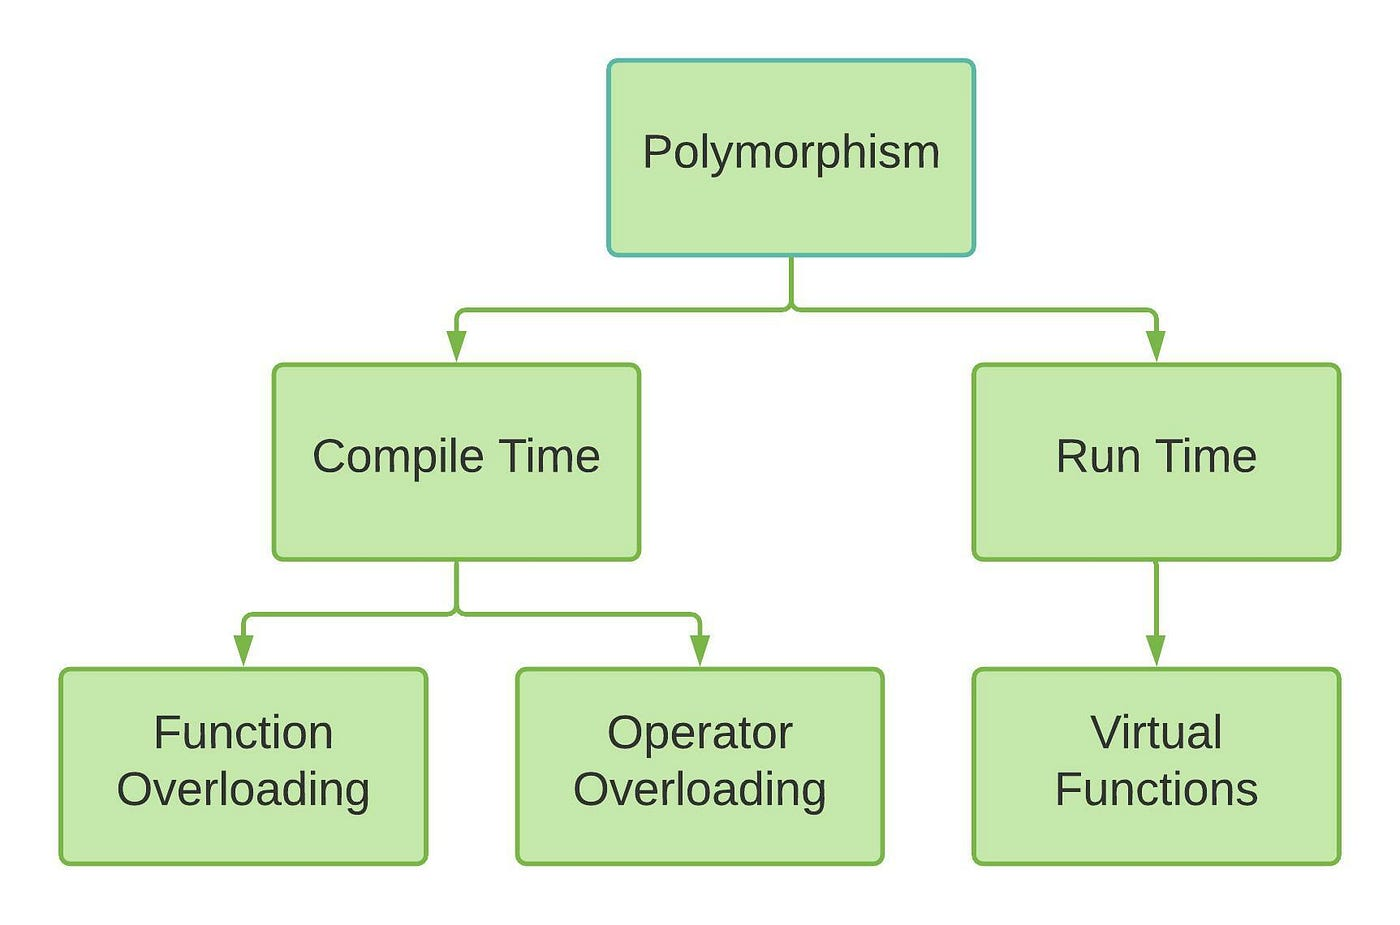

### 1.overloading (compile-time)
### 1)a)method overloading
* it allows multiple methods to have the same name, but with different parameters.
* This can be useful for providing different implementations of a method for different data types or for different numbers of arguments.
* method overloading is not supported in python in a built-in-way, so there are two ways to do method overloading by using duck typing & decorators.
* One way is to use the @overload decorator, Another way is to use a function that takes a variable number of arguments.
### Advantages of method overloading in Python
* reduces complexities.
* improves the quality of the code.
* it is also used for reusability and easy accessibility.

### dispatch in python
* Dispatch in Python is a mechanism for performing different things based on the type of data that is passed to a function. This can be useful for implementing different behaviors for different types of data, or for providing different levels of functionality depending on the data that is available.
* There are two main ways to implement dispatch in Python:
1. Type-based dispatch:
This is the most common type of dispatch, and it involves calling different functions based on the type of the data that is passed to them. This can be implemented using the @dispatch decorator, or by using a dictionary to map data types to functions.
2. Context-based dispatch:
This type of dispatch involves calling different functions based on the context in which a function is called. This can be implemented using the @contextlib.contextmanager decorator, or by using a stack to keep track of the current context.

In [1]:
import multipledispatch
from multipledispatch import dispatch

In [2]:
# method overloading
class myclass:
    def __init__(self, a, b): # numerical datatypes & list, tuples works in this manner
        self.a = a
        self.b = b
    
    @dispatch(int, int)
    def foo (self, x, y):
        return x + y # upto here
    
    @dispatch(set, set) # we can give any datatypes but in a tuple it should be same datatypes like (int, int).
    def foo(self, m, n):
        return m.union(n)
    
x = myclass(5, 10)
x.foo(2, 3)
x.foo({1, 2, 3}, {4, 5, 6, 1, 2})

{1, 2, 3, 4, 5, 6}

In [3]:
# method over-loading
class myclass: # creating a class 
    def __init__(self, a, b): # numerical datatypes & list, tuples works in this manner # instance # constructor
        self.a = a
        self.b = b
    
    @dispatch(int, int)
    def foo (self, x, y):
        return x * y # upto here
    
    @dispatch(set, set) 
    def foo(self, m, n):
        return m.union(n)
    
    @dispatch(str, str)
    def foo(self, m, n):
        return m + n
x = myclass(5, 10)
x.foo(2, 3)
x.foo({1, 2, 3}, {4, 5, 6, 1, 2})

{1, 2, 3, 4, 5, 6}

In [4]:
# method over-loading
class myclass:
    def __init__(self, a, b): # numerical datatypes & list, tuples works in this manner
        self.a = a
        self.b = b
    
    @dispatch(int, int)
    def foo (self, x, y):
        return x * y # upto here
    
    @dispatch(set, set) # passed two values
    def foo(self, m, n):
        return m.union(n)
    
    @dispatch(str, str)
    def foo(self, m, n):
        return m + n
    
    @dispatch(int, int, int) # passed three values
    def foo (self, x, y, z):
        return (x * y)//z
    
x = myclass(5, 10)
x.foo({1, 2, 3}, {4, 5, 6, 1, 2})

{1, 2, 3, 4, 5, 6}

In [5]:
x.foo('sathwika ', 'suggala')

'sathwika suggala'

In [6]:
x.foo(2, 3)

6

In [7]:
# method over-loading
class myclass:
    def __init__(self, a, b): # numerical datatypes & list, tuples works in this manner
        self.a = a
        self.b = b
    
    @dispatch(int, int)
    def foo (self, x, y):
        return x * y # upto here
    
    @dispatch(set, set) # passed two values
    def foo(self, m, n):
        return m.union(n)
    
    @dispatch(str, str)
    def foo(self, m, n):
        return m + n
    
    @dispatch(int, int, int) # passed three values
    def foo (self, x, y, z):
        return (x * y)//z
    
    @dispatch(list, list)
    def foo(self, m,n):
        return [u*v for u,v in zip(m,n)]
    
x = myclass(5, 10)
x.foo(2, 3)
x.foo([1, 2, 3], [4, 5, 6, 1, 2])

[4, 10, 18]

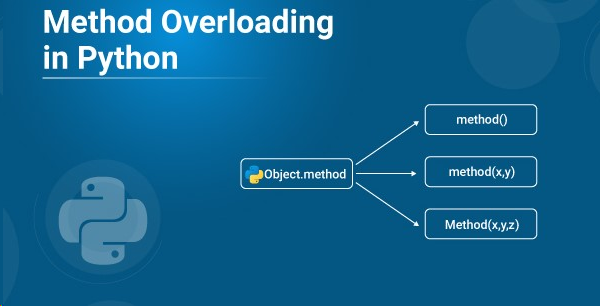

### 1)b)constructor overloading
* Python does not support constructor overloading. If a programmer writes multiple __init__ methods for the same class, the most recently written __init__ function overwrites all other constructors.
* in python there are a few ways to simulate constructor overloading. One way is to use optional arguments and default values.
* Another way to simulate constructor overloading in Python is to use the type of the argument passed to the __init__ function. 
* A third way to simulate constructor overloading in Python is to define class methods to handle different types of input arguments. Class methods can be defined using the @classmethod decorator.

In [8]:
# constructor overloading
class myclass:
    
    @dispatch(int, int)
    def __init__(self, a, b): # constructor
        self.x = a*b # x- here is an arg
        
    @dispatch(str, str) # method
    def __init__(self, fname, lname):
        self.name = fname+ ''+ lname
    
x = myclass(1, 5)
x.x # first constructor

5

In [9]:
y = myclass('abc' , 'def')
y.name # second constructor

'abcdef'

### 1)a)b) method & constructor overloading

In [17]:
# 2 method over-loading & 2 constructor overloading
class Parent:
    
    @dispatch(int, int) # method
    def foo(self, x, y):
        return  x * y # upto here
    
    @dispatch(set, set) # passed two values
    def foo(self, m, n):
        return m.union(n)
    
    @dispatch(str, str) # constructor
    def __init__(self, fname, lname):
        self.name = fname+' '+lname
    
    @dispatch(int, int, int) # passed three values
    def foo (self, x, y, z):
        return (x * y)//z
    
    @dispatch(list, list)
    def foo(self, m,n):
        return [i*j for i, j in zip(m, n)]

In [18]:
    class child(Parent):
        pass
    
x = child('abc' , 'xyz')
x.name

'abc xyz'

### 1)c)operator overloading
* this feature allows you to change behaviour of operators used with user-defined classes.
* this is useful for the implementation of custom operations
* operator + is used to add two integers as well as join two strings and merge two lists.
* It is achievable because ‘+’ operator is overloaded by int class and str class.
* You might have noticed that the same built-in operator or function shows different behavior for objects of different classes, this is called Operator Overloading.
* To overload an operator, you need to define a special method in your class with the same name as the operator. The method should take two arguments, self and other, which represent the objects on which the operator is being applied. The method should then return the result of the operation.
* (or)
* Operator Overloading means giving extended meaning beyond their predefined operational meaning. For example operator + is used to add two integers as well as join two strings and merge two lists. It is achievable because ‘+’ operator is overloaded by int class and str class. You might have noticed that the same built-in operator or function shows different behavior for objects of different classes, this is called Operator Overloading.

### Advantages of Operator Overloading
* Some advantages of operator overloading-
* Improves code readability by allowing the use of familiar operators.
* Ensures that objects of a class behave consistently with built-in types and other user-defined types.
* Makes it simpler to write code, especially for complex data types.
* Allows for code reuse by implementing one operator method and using it for other operators.

In [10]:
# multiplying two list by using magic method multiplication
class mylist: #creating list
    def __init__(self, value): #accept list
        self.val = value 
        
    def __mul__(self, othermylist): # overloading mul operator
        return [i*j for i, j in zip(self.val, othermylist.val)]
    
x, y = mylist([1,2,3]), mylist ([4,5,6]) # multiplying two objects by using list myclass
x*y

[4, 10, 18]

In [11]:
# using the magic method for finding the greater value
class list1: #creating list
    def __init__(self, value): #accept list
        self.val = value 
        
    def __ge__(self, othermylist): # overloading greator than operator
        return [i>j for i, j in zip(self.val, othermylist.val)]
    
x, y =([1,2,3]), ([4,5,6]) # using greater than method (ge) two objects by using list myclass
x,y

([1, 2, 3], [4, 5, 6])

In [12]:
x>y

False

In [13]:
x<y

True

## 2)overriding(runtime)
### 2)a)method overriding
* Method overriding is the process of redefining a method in a child class to provide a different implementation. 
* This allows child classes to customize the behavior of methods inherited from parent classes.

### Features of Method Overriding in Python
* These are some of the key features and advantages of method overriding in Python --
* Method Overriding is derived from the concept of object oriented programming
* Method Overriding allows us to change the implementation of a function in the child class which is defined in the parent class.
* Method Overriding is a part of the inheritance mechanism
* Method Overriding avoids duplication of code
* Method Overriding also enhances the code adding some additional properties.

In [14]:
### method over-riding
class fooclass:
    def __init__(self, a, b):
        self.a = a # a- here is an arg
        self.b = b
        
    def foo(self):
        print('hello')
        
x = fooclass(5,10)
x.foo()

hello


### 2)b)a)constructor over-ride & method over-riding

In [15]:
### method over-riding & constructor
class fooclass:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __init__(self, a, b, c, d):
        self.m = a+b
        self.n = c-d
        
    def foo(self):
        print('hello')
    
    def foo(self):
        print('good morning')
        
x = fooclass(5, 10, 10, 5)
x.foo() #override by second

good morning


### 2)b)Constructor and method overriding using inheritance

In [16]:
# constructor 
class xclass(fooclass):
    def foo(self):
        print('baka!')
            
x = xclass(10, 5, 10, 5)
x.foo()

baka!


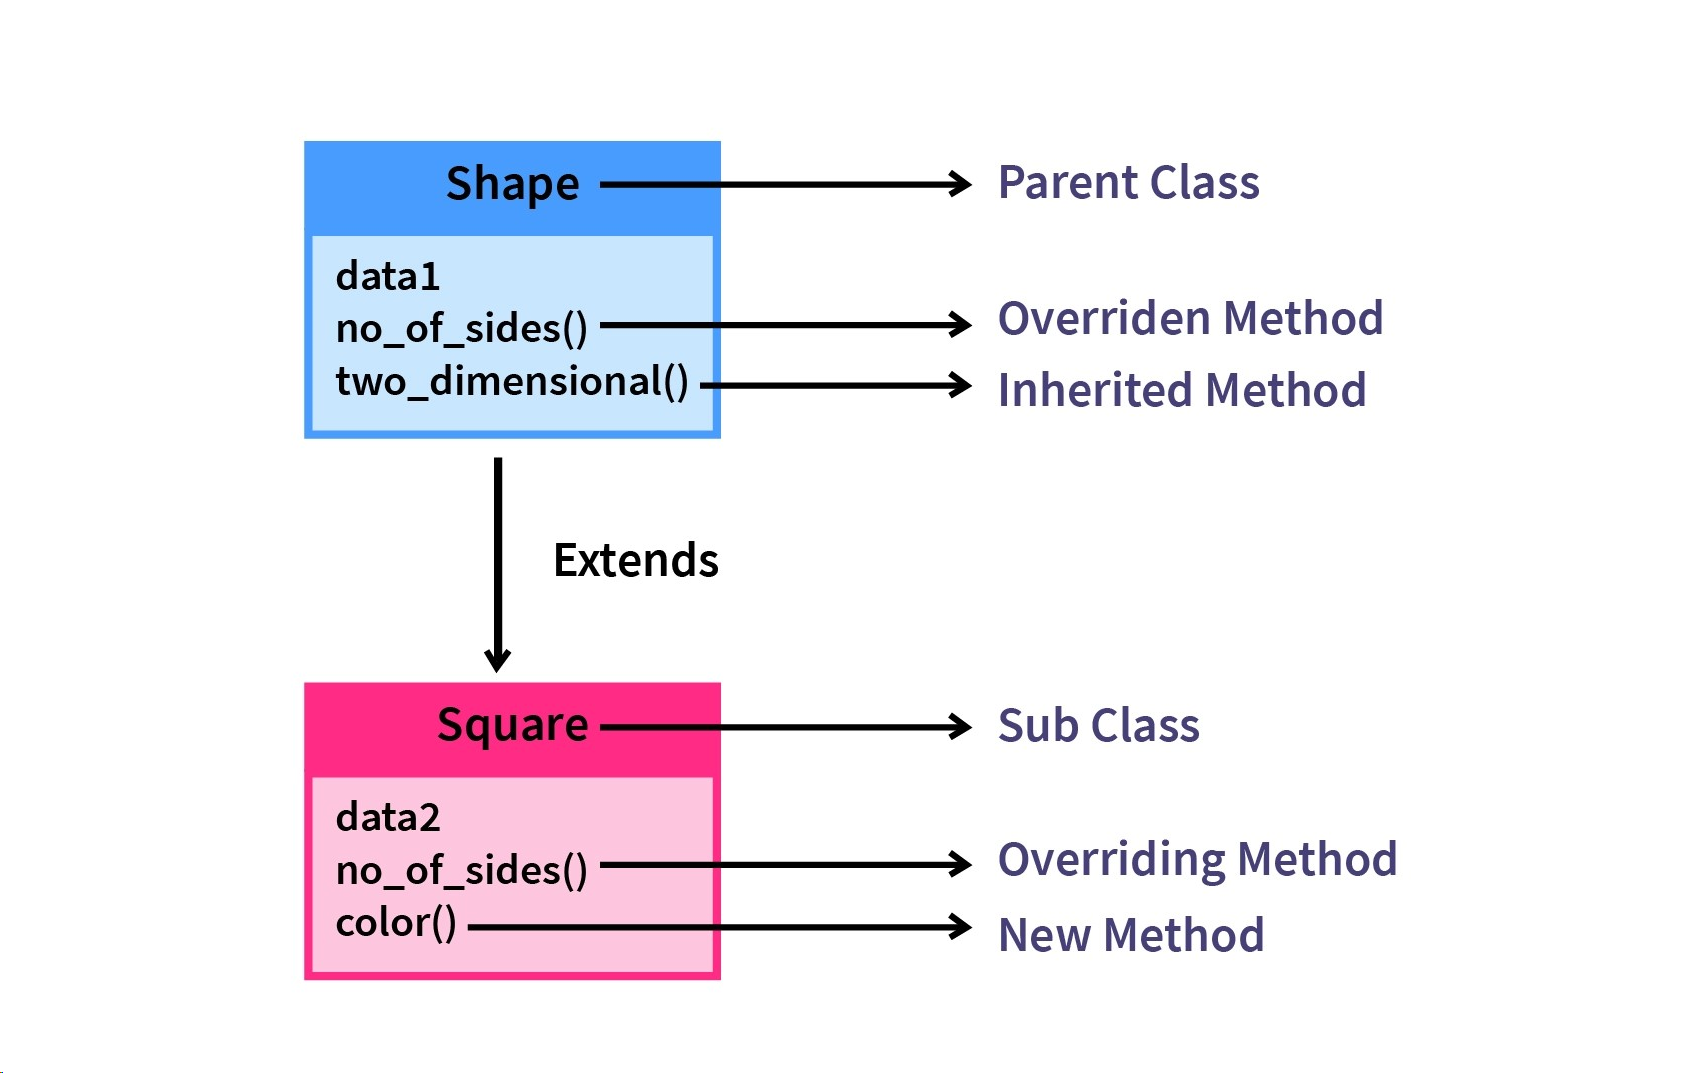

### abstraction (explore factory design method)
* user is kept unaware of the basic implementation of a function property. the user is only able to view basic functionalities whereas the internal details are hidden.
* An abstract method is a method that is declared but has no implementation.
* It is a way to define a common interface for different implementations of a component. 
* Abstract methods are declared with the @abstractmethod decorator from the abc module.
> syntax: from abc import ABC
class Abs_class(ABC):
    * abstract methods
    * class methods

In [19]:
import abc
from abc import abstractmethod, ABC

In [20]:
# abstraction
class ben10(ABC): # inherited from abc which is abstract method
    
    @abstractmethod # ACTS IN INSTANCE LEVEL
    def omnitransformation(self): 
        '''yo!'''
        pass

In [21]:
class diamondhead(ben10):
    def omnitransformation(self):
        ''' diamondhead!'''
        print('diamondhead transformation done!')
        
x = diamondhead()
x.omnitransformation()

diamondhead transformation done!


In [22]:
def foo(x : str, y : str):
    return x+y
foo(5,6)

11

In [23]:
foo([1,2,3], [4,5,6])

[1, 2, 3, 4, 5, 6]

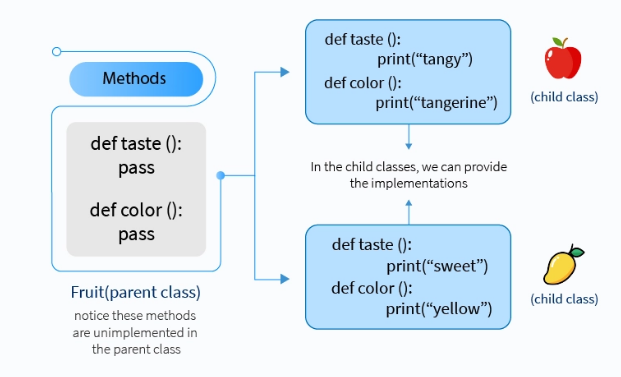

### duck typing
* Polymorphism can also be achieved through duck typing, which is a form of dynamic typing where the object type is determined by its methods rather than its class.
* In Duck Typing, the type or class of an object is less important than the methods it defines.
* In Duck Typing, we do not check types at all. Instead, we check for the presence of a given method or attribute.
* In Duck Typing, the object's type itself is not significant. This means that we do not declare the argument in method prototypes.
* In Duck Typing, compilers cannot do type-checking. Therefore, what really matters is if the object has particular attributes at run time.

In [24]:
class duck:
    def quack(self):  # if same method exists
        print('quack')
        
    def fly(self):
        print('flap-flap!')
        
class dogduck:
    def quack(self): # if same methods exists
        print('bowuaak!')
            
    def fly(self):
        print('zoom')

In [25]:
def foo(x : duck):
    x.quack()
    
a, b = duck(), dogduck()
foo(a)

quack
